In [50]:
import pandas as pd
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv("trainingdata.txt", header=None, names = ["X","Y"])

In [19]:
train.head()


,X,Y
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80


In [20]:
train.describe()

,X,Y
count,100.000000,100.000000
mean,4.573000,6.206800
std,2.788603,2.454116
min,0.000000,0.000000
25%,1.987500,3.975000
50%,4.375000,8.000000
75%,6.522500,8.000000
max,11.720000,8.000000


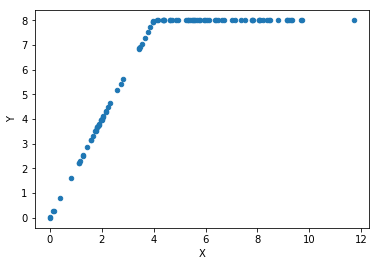

In [11]:
train.plot.scatter(x="X", y="Y")

In [90]:
train.loc[train.X <= 4,].sort_values("Y", ascending = False).head()

,X,Y
87,3.99,7.98
53,3.97,7.94
93,3.97,7.94
3,3.87,7.74
62,3.77,7.54


In [68]:
inLinear = train.Y < 8

In [70]:
train_linear = train[inLinear]

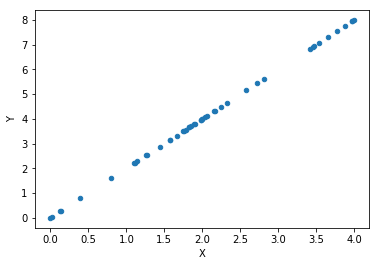

In [74]:
train_linear.plot.scatter("X", "Y")

In [75]:
train_X, test_X, train_y, test_y = train_test_split(train_linear.X, train_linear.Y, test_size = 0.33, random_state=0)

In [91]:
train_X

array([[1.11],
       [1.83],
       [2.33],
       [3.99],
       [1.58],
       [1.78],
       [2.06],
       [2.  ],
       [1.83],
       [0.13],
       [2.24],
       [1.98],
       [0.  ],
       [3.42],
       [2.72],
       [3.77],
       [0.02],
       [1.44],
       [1.66],
       [0.8 ],
       [1.98],
       [1.89],
       [1.26],
       [1.75],
       [3.45],
       [1.99],
       [3.97],
       [1.9 ],
       [2.81],
       [3.65]])

In [77]:
train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)


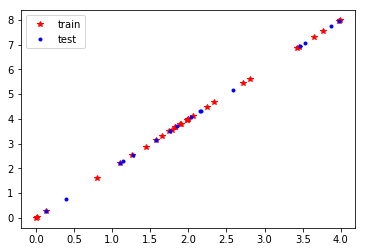

In [78]:
plt.plot(train_X, train_y, '*r', test_X, test_y, '.b')
plt.legend(["train","test"])

In [79]:
#model = GaussianProcessRegressor(random_state=0)
model = LinearRegression() 

In [80]:
model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
pred_y = model.predict(test_X)

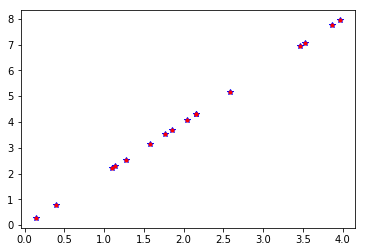

In [82]:
plt.plot(test_X, pred_y, '*b', test_X, test_y, '.r')

In [85]:
model.predict(np.array(0.09).reshape(-1,1))

array([0.18])